# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print "Neighbour triangles\n",tri.neighbors[0:5]
print "Simplices\n", tri.simplices[0:5]
print "Points\n", points[tri.simplices[0:5]]

Neighbour triangles
[[ 1 -1 25]
 [ 4  0  2]
 [ 3  1 24]
 [22  2 13]
 [ 5  1  6]]
Simplices
[[25 27 29]
 [27 18 29]
 [27 14 18]
 [14  3 18]
 [18 26 29]]
Points
[[[0.06484433 0.2213193 ]
  [0.1911024  0.38231972]
  [0.02265441 0.97487643]]

 [[0.1911024  0.38231972]
  [0.35486532 0.69895178]
  [0.02265441 0.97487643]]

 [[0.1911024  0.38231972]
  [0.4754994  0.34897127]
  [0.35486532 0.69895178]]

 [[0.4754994  0.34897127]
  [0.54878882 0.5122997 ]
  [0.35486532 0.69895178]]

 [[0.35486532 0.69895178]
  [0.3940367  0.87716154]
  [0.02265441 0.97487643]]]


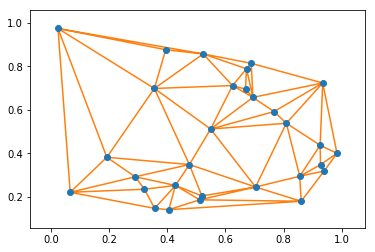

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

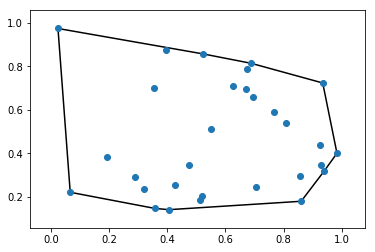

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

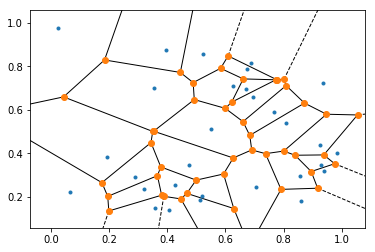

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print tree.data

[[0.52304103 0.85784918]
 [0.9275347  0.34843286]
 [0.94036866 0.31956067]
 [0.54878882 0.5122997 ]
 [0.86079535 0.17996057]
 [0.92617859 0.43763262]
 [0.85592417 0.29511096]
 [0.427547   0.25270635]
 [0.5109369  0.18672716]
 [0.40440791 0.14129524]
 [0.76735978 0.5925638 ]
 [0.32066425 0.23532009]
 [0.70363771 0.24558095]
 [0.66897234 0.69557836]
 [0.4754994  0.34897127]
 [0.80971293 0.53888273]
 [0.35573572 0.1473329 ]
 [0.67239979 0.78947399]
 [0.35486532 0.69895178]
 [0.28882487 0.29259027]
 [0.62421059 0.71230242]
 [0.51856244 0.20445696]
 [0.98419878 0.40093903]
 [0.6887811  0.8145673 ]
 [0.69445439 0.6578562 ]
 [0.06484433 0.2213193 ]
 [0.3940367  0.87716154]
 [0.1911024  0.38231972]
 [0.93505454 0.72420007]
 [0.02265441 0.97487643]]


In [8]:
%%timeit

tree.query((0.5,0.5))

The slowest run took 190.66 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 31.4 µs per loop


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

1000 loops, best of 3: 717 µs per loop


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

10 loops, best of 3: 34.1 ms per loop


In [13]:
%%timeit

big_tree.query(test_points) 

10 loops, best of 3: 159 ms per loop


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently). 


In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print brute_force_distance(more_points, (0.0,0.0))
print big_tree.query((0.0,0.0))

(0.00747254419338845, 4352)
(0.00747254419338845, 4352)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

10000 loops, best of 3: 42.9 µs per loop


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

The slowest run took 8.37 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 32.6 µs per loop


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))


1000 loops, best of 3: 788 µs per loop


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

1000 loops, best of 3: 904 µs per loop
